This example has been prepared solely to demonstrate its use and to compare it accuracy with Sklearn.

In [1]:
import pandas as pd
from KNNClassifier import KNNClassifier, random_train_test_split, KFold

Database Source:https://www.openml.org/d/1508

In [2]:
users = pd.read_csv('user_knowledge.csv')

In [3]:
users.head()

,V1,V2,V3,V4,V5,Class
0,0.00,0.00,0.00,0.00,0.00,4
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,2
3,0.10,0.10,0.15,0.65,0.30,3
4,0.08,0.08,0.08,0.98,0.24,2


In [4]:
users.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
Class      int64
dtype: object

In [5]:
users.Class.value_counts()

2    129
3    122
1    102
5     26
4     24
Name: Class, dtype: int64

In [6]:
users.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
Class    0
dtype: int64

In [7]:
users.Class = users.Class.replace({1:"One",2:"Two",3:"Three",4:"Four",5:"Five"})
users.Class= users.Class.astype('category')

In [8]:
users.Class.value_counts()

Two      129
Three    122
One      102
Five      26
Four      24
Name: Class, dtype: int64

In [9]:
users_Y = users["Class"]
users_X = users.drop(["Class"],axis=1)

In [10]:
train_X, test_X, train_Y, test_Y = random_train_test_split(users_X, users_Y, test_size=0.2, random_state=44)

In [11]:
knn = KNNClassifier(K=9,scale="min-max",distance_metric="canberra", weighting="distance")
knn.fit(train_X,train_Y)
pred_Y = knn.predict(test_X)
acc, conf_matrix = knn.evaluation(test_Y, pred_Y)

In [12]:
print("acc: %"+ str(acc.values))

acc: %[0.83950617]


In [13]:
conf_matrix

Predicted,Five,Four,One,Three,Two,All
Actual,,,,,,
Five,3,1,0,0,3,7
Four,3,0,0,0,2,5
One,0,0,19,0,0,19
Three,0,0,0,14,2,16
Two,0,0,0,2,32,34
All,6,1,19,16,39,81


In [14]:
c_report = knn.classification_report(conf_matrix, only_print=False)

   precision   recall   f1-score

0    0.5    0.5    0.5
1    0.0    0.0    0.0
2    1.0    1.0    1.0
3    0.875    0.875    0.875
4    0.8205    0.8205    0.8205



In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import sklearn.preprocessing as prep

In [16]:
scaler = prep.MinMaxScaler()
scaler.fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns=train_X.columns)
scaler.fit(test_X)
test_X = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)

In [17]:
knn = KNeighborsClassifier(n_neighbors=9, metric='canberra', weights="distance")

knn.fit(train_X, train_Y)

y_pred = knn.predict(test_X)

print(metrics.accuracy_score(test_Y,y_pred))

print(metrics.confusion_matrix(test_Y,y_pred))

print(metrics.classification_report(test_Y,y_pred))

0.8395061728395061
[[ 3  1  0  0  3]
 [ 3  0  0  0  2]
 [ 0  0 19  0  0]
 [ 0  0  0 14  2]
 [ 0  0  0  2 32]]
              precision    recall  f1-score   support

        Five       0.50      0.43      0.46         7
        Four       0.00      0.00      0.00         5
         One       1.00      1.00      1.00        19
       Three       0.88      0.88      0.88        16
         Two       0.82      0.94      0.88        34

    accuracy                           0.84        81
   macro avg       0.64      0.65      0.64        81
weighted avg       0.80      0.84      0.82        81



In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
k_values = list(range(1,15,1))
accuracy_list = []

In [20]:
for i in k_values:
    knn = KNNClassifier(K=i, scale="min-max", distance_metric="minkowski")
    acc = KFold(knn, users_X, users_Y, cv = 10, random_state=44)
    accuracy_list.append(acc)

In [21]:
print("mean: " + str(np.mean(accuracy_list)) + "\n" + "std: " + str(np.std(accuracy_list)))

mean: 0.8114285714285714
std: 0.017921313271849135


The optimal number of neighbors is 3


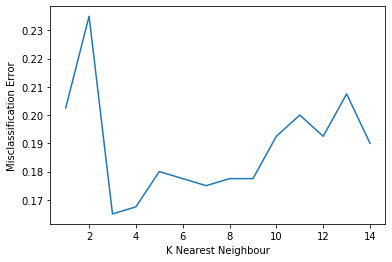

In [22]:
mse = [1 - x for x in accuracy_list]

optimal_k = k_values[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# Missclassification vs K
plt.plot(k_values, mse)
plt.xlabel("K Nearest Neighbour")
plt.ylabel("Misclassification Error")
plt.show()